### Imported Libraries

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in cast")
warnings.filterwarnings("ignore", category=UserWarning, module="scipy.optimize.linesearch")
warnings.filterwarnings('ignore')


In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Import the matplotlib and seaborn libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
import seaborn as sns
sns.set()
import plotly
import plotly.express as px



In [3]:
dataset = pd.read_csv('companies.csv')
df = dataset.copy()
df.head(10)

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
5,c:10002,5,Company,10002,NaN,Synergie Media,synergie media,/company/synergie-media,advertising,operating,2007-06-27,NaN,synergie-media.com,http://www.synergie-media.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,284.0,48.0,NaN,NaN,Synergie Media is a Dutch and Moroccan Web Des...,"social-media, web-design, web-development, out...",MAR,NaN,Agadir,Agadir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2008-08-24 17:39:10,2008-09-06 14:19:19,30.427755,-9.598107,NaN
6,c:10003,6,Company,10003,NaN,Green Basti Ecosystems,green basti ecosystems,/company/green-basti-ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creating infrastructure to provide incentives ...,"cleantech, alternative-energy, biogas, carbon-...",IND,NaN,Vadodara,Vadodara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 19:49:25,2010-04-22 23:48:20,22.307159,73.181219,NaN
7,c:100042,7,Company,100042,NaN,HostNine,hostnine,/company/hostnine,NaN,operating,NaN,NaN,hostnine.com,http://www.hostnine.com,Hostnine,http://s3.amazonaws.com/crunchbase_prod_assets...,187.0,53.0,NaN,NaN,At HostNine they are commited to continually e...,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df.ROI.value_counts()

10.000000       8
5.000000        5
20.000000       5
16.666667       4
15.000000       4
8.333333        4
3.333333        3
0.666667        3
8.000000        3
1.000000        3
35.000000       3
16.000000       3
10.500000       3
12.500000       3
2.666667        3
9.090909        3
2.000000        2
2.333333        2
9.600000        2
3.428571        2
2.777778        2
72.000000       2
3.846154        2
12.000000       2
19.230769       2
3.977273        2
4.545455        2
17.000000       2
5.625000        2
7.692308        2
1.666667        2
15.500000       2
3.500000        2
25.000000       2
3.571429        2
13.466667       2
7.142857        2
40.000000       2
6.250000        2
5.454545        2
1.400000        2
9.188106        1
17.573391       1
7.264545        1
3.717472        1
11.111111       1
10.672704       1
5.975695        1
0.964912        1
11.844156       1
8.467742        1
2.885558        1
3.684211        1
26.273885       1
4.642857        1
2.911392  

**Brief description of each column in the dataset:**

- id: An identifier for the company.
- Unnamed: 0.1: An additional index identifier which is a duplicate one.
- entity_type: The type of entity (all columns are "Company").
- entity_id: Another identifier for the entity from "extended from Id column "
- parent_id: Blank Column
- name: The name of the entity.
- normalized_name: A lower cased version of the entity's name.
- permalink: A permalink associated with the entity.
- category_code: The category or industry of the entity.
- status: The operating status of the entity (e.g., "operating" or "acquired").
- founded_at: The date when the entity was founded.
- closed_at: The date when the entity was closed, if applicable.
- domain: The domain associated with the entity.
- homepage_url: The homepage URL of the entity.
- twitter_username: The Twitter username of the entity.
- logo_url: The URL of the entity's logo.
- logo_width: The width of the entity's logo.
- logo_height: The height of the entity's logo.
- short_description: A short description of the entity.
- description: A detailed description of the entity.
- overview: An overview of the entity.
- tag_list: Tags associated with the entity.
- country_code: The country code of the entity.
- state_code: The state code of the entity.
- city: The city where the entity is located.
- region: The region where the entity is located.
- first_investment_at: Date of the first investment made.
- last_investment_at: Date of the last investment made.
- investment_rounds: Number of investment rounds.
- invested_companies: Number of companies in which this entity has invested.
- first_funding_at: Date of the first funding received.
- last_funding_at: Date of the last funding received.
- funding_rounds: Number of funding rounds.
- funding_total_usd: Total funding received in USD.
- first_milestone_at: Date of the first milestone.
- last_milestone_at: Date of the last milestone.
- milestones: Information about milestones.
- relationships: Information about relationships.
- created_by: Creator or source of the data.
- created_at: Date and time of data creation.
- updated_at: Date and time of data update.
- lat: Latitude coordinate (location).
- lng: Longitude coordinate (location).
- ROI: Return on Investment (a financial metric).

In [5]:
df.shape

(196553, 44)

In [6]:
df.isnull().sum()

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [8]:
df.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


###### *Note:*
To predict a former startup's acquisition status based on company financial statistics, we should select the columns that are relevant as inputs (features) and remove any columns that are not useful or may introduce noise into the model.

As we can see, we have a significant number of missing values in the dataset.
- Handling missing data should be done carefully to avoid introducing bias or incorrect information into the analysis.

#### Input Features (Columns to Keep):

- category_code: The industry or category of the company.
- founded_at: The date when the company was founded.
- closed_at: The date when the company was closed (if available).
- country_code: The country where the company is located.
- city: The city where the company is located.
- first_investment_at: Date of the first recorded investment.
- last_investment_at: Date of the last recorded investment.
- investment_rounds: Number of investment rounds.
- first_funding_at: Date of the first funding received.
- last_funding_at: Date of the last funding received.
- funding_rounds: Number of funding rounds.
- funding_total_usd: Total funding received in USD.
- first_milestone_at: Date of the first milestone.
- last_milestone_at: Date of the last milestone.
- milestones: Information about company milestones.
- relationships: Information about company relationships.
- lat: Latitude of the company's location.
- lng: Longitude of the company's location.
- ROI: Return on Investment (a financial metric).


#### Output (Target Variable):

- status: This is the column you want to predict. It represents the acquisition status of the former startup.


#### Columns to Remove:

- id: These columns are not relevant for prediction.
- Unnamed: 0.1: An index or duplicate which can be removed.
- entity_type and entity_id: These columns are not relevant for prediction.
- parent_id: Column contain null values only.
- name, normalized_name, permalink, and similar columns: These columns are not directly related to financial statistics.
- homepage_url, twitter_username, domain, logo_width, logo_height, and logo_url: These columns are not relevant for predicting acquisition status. Usless hyperlinks for the model phase.
- short_description, description, overview: These columns contain textual descriptions or tags, which may not be directly related to financial statistics.
- state_code ,and region: state code is only for USA states, which means nulls for every other country which is not informative. region is redundant column and may contain information that is not relvant to city and country code.
- taglist: it can either removed or kept. If we are going to ue Taglist, we are going to consider NLP using tokenization and feature extraction as TF-IDF or word embeddings to recognize the tag lists for each company. But we won't implment NLP, so we are dropping the column.
- created_by, created_at ,and updated_at: These columns are not relevant for predicting acquisition status.

In [9]:
df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

### Data Cleaning

In [10]:
df.drop(columns =["region","city","state_code"],inplace = True)

In [11]:
df.drop(columns =['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'], inplace = True)

In [12]:
df.drop(columns =[ 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',
                       'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 
                       ],inplace = True)

In [13]:
# # Scatter Geometrically Companies across the World
# fig = px.scatter_geo(
#     df, 'lat', 'lng',
#     color='country_code',
#     scope='world',
#     title='Countries contain Companies'
# )
# # Adjust the height and width of the plot
# fig.update_layout(
#     height=600,  
#     width=1100,  
# )
# fig.show()

In [14]:
numeric_df = df.select_dtypes(include=['number'])

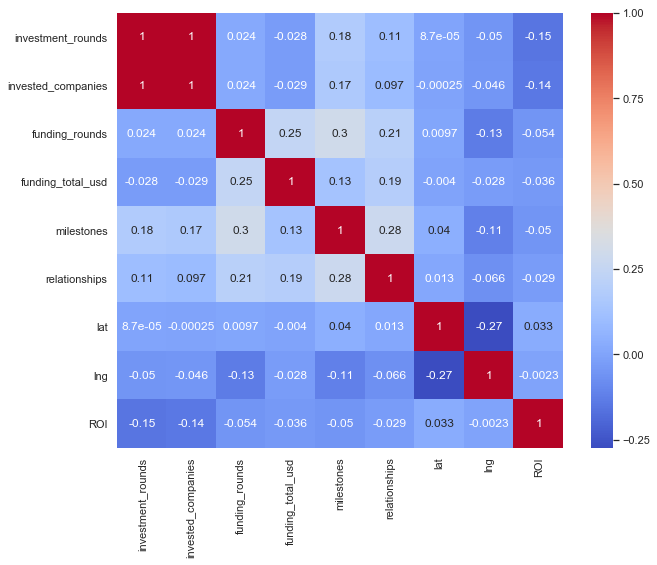

In [15]:
%matplotlib inline
plt.figure(figsize=(10, 8))
sns.set_context('notebook')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

##### Filling the missing values

In [16]:
df.ROI.describe(percentiles = [0.25,0.50,0.75,0.95,0.98])

count      726.000000
mean        45.745037
std        572.035638
min          0.011111
25%          2.648879
50%          6.500497
75%         13.549900
95%         56.857143
98%        119.308943
max      13333.333333
Name: ROI, dtype: float64

In [17]:
df['investment_rounds'] = df['investment_rounds'].fillna(df['investment_rounds'].median())
df['invested_companies'] = df['invested_companies'].fillna(df['invested_companies'].median())
df['funding_rounds'] = df['funding_rounds'].fillna(df['funding_rounds'].median())
df['milestones'] = df['milestones'].fillna(df['milestones'].mode()[0])
df['relationships'] = df['relationships'].fillna(df['relationships'].mean())
df['ROI'] = df['ROI'].fillna(df['ROI'].median())


In [18]:
df.ROI.value_counts()

6.500497        195827
10.000000            8
5.000000             5
20.000000            5
15.000000            4
8.333333             4
16.666667            4
1.000000             3
16.000000            3
0.666667             3
8.000000             3
3.333333             3
9.090909             3
35.000000            3
2.666667             3
10.500000            3
12.500000            3
3.977273             2
1.666667             2
7.692308             2
5.625000             2
17.000000            2
4.545455             2
19.230769            2
2.333333             2
12.000000            2
3.846154             2
72.000000            2
6.250000             2
2.000000             2
9.600000             2
3.428571             2
15.500000            2
2.777778             2
3.500000             2
25.000000            2
13.466667            2
7.142857             2
3.571429             2
40.000000            2
1.400000             2
5.454545             2
10.264901            1
4.642857   

##### Delete those which has more than 98% of null values.

In [19]:
# Calculate the percentage of NaN values in each column
nan_percentage = (df.isnull().mean()) * 100

# Print the percentage of NaN in each column
print("Percentage of NaN in each column:")
print(nan_percentage)

Percentage of NaN in each column:
category_code          37.326828
status                  0.000000
founded_at             53.586564
closed_at              98.667026
country_code           55.233448
first_investment_at    98.685851
last_investment_at     98.685851
investment_rounds       0.000000
invested_companies      0.000000
first_funding_at       83.970227
last_funding_at        83.970227
funding_rounds          0.000000
funding_total_usd      85.818583
first_milestone_at     53.346426
last_milestone_at      53.346426
milestones              0.000000
relationships           0.000000
lat                    57.338733
lng                    57.338733
ROI                     0.000000
dtype: float64


**NOTE:**
- However ROI is 99% null values, we can't drop this column as it's a financial metric and is related to the project's objective.

- Closed_at contain many null values, as there are so many companies that still exist. So we can add a new col "IsClosed" binary classification which would be more beneficial instead of the Date column of the Closed_at

##### Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.

In [20]:
# drop NAn in specific columns
df.dropna(subset= ['status', 'country_code', 'category_code', 'founded_at'],inplace = True)

#### Date Transformation

##### Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [21]:
# For founded_at
df['founded_at'] = pd.to_datetime(df['founded_at']).dt.year
df['founded_at'] = df['founded_at'].fillna(df['founded_at'].mode()[0])

# closed_at
df['closed_at'] = pd.to_datetime(df['closed_at']).dt.year

# # first_funding_at
df['first_funding_at'] = pd.to_datetime(df['first_funding_at']).dt.year

# # last_funding_at
df['last_funding_at'] = pd.to_datetime(df['last_funding_at']).dt.year

# # first_milestone_at
df['first_milestone_at'] = pd.to_datetime(df['first_milestone_at']).dt.year

# # last_milestone_at
df['last_milestone_at'] = pd.to_datetime(df['last_milestone_at']).dt.year
df.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005,NaN,USA,NaN,NaN,1.0,1.0,2005.0,2008.0,3.0,39750000.0,2010.0,2013.0,5.0,17.000000,47.606209,-122.332071,15.500000
5,advertising,operating,2007,NaN,MAR,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2.000000,30.427755,-9.598107,6.500497
6,cleantech,operating,2008,NaN,IND,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2.852067,22.307159,73.181219,6.500497
12,advertising,operating,2008,NaN,USA,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,2008.0,2008.0,1.0,2.000000,35.686975,-105.937799,6.500497
13,web,acquired,2007,NaN,USA,NaN,NaN,1.0,1.0,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,14.000000,37.386052,-122.083851,9.500000


##### Filling the closed_at column with some condition.

- If Status is operating or ipo, fillna with 2021
- If Status is accquired or closed, fillna with mode()

In [22]:
for i in df['status']:
    if (i == 'operating' or 'ipo'):
        df['closed_at'].fillna(2021,inplace = True)
    elif (i == 'accquired' or 'closed'):
        df['closed_at'].fillna(2012, inplace = True)

##### Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [23]:
df["active_days"] = (df['closed_at'] - df['founded_at'] )* 365

In [24]:
# Droping negative values of active_days
index = np.where(df['active_days'] < 0)
df['active_days'] = df['active_days'].drop(df['active_days'].index[index])

In [25]:
df['active_days'] = df['active_days'].fillna(0)

In [26]:
df.shape

(64099, 21)

In [27]:
df.isna().sum()

category_code              0
status                     0
founded_at                 0
closed_at                  0
country_code               0
first_investment_at    63351
last_investment_at     63351
investment_rounds          0
invested_companies         0
first_funding_at       41348
last_funding_at        41348
funding_rounds             0
funding_total_usd      43630
first_milestone_at     28796
last_milestone_at      28796
milestones                 0
relationships              0
lat                     2414
lng                     2414
ROI                        0
active_days                0
dtype: int64

#### EDA to Remove Outliers and Visualize Data

##### Checking for Outliers in the numerical columns 'funding_total_usd', 'funding_rounds', 'milestones', and 'relationships'.

In [28]:
# fig, axes = plt.subplots(4, 2, figsize=(15, 10))

# # Create your boxplots and titles for each subplot
# sns.boxplot(df.funding_rounds, ax=axes[0, 0])
# axes[0, 0].set_title("funding_rounds", fontsize=20)
# axes[0, 0].set_xlabel('')

# sns.boxplot(df.funding_total_usd, ax=axes[0, 1])
# axes[0, 1].set_title("funding_total_usd", fontsize=20)
# axes[0, 1].set_xlabel('')

# sns.boxplot(df.milestones, ax=axes[1, 0])
# axes[1, 0].set_title("milestones", fontsize=20)
# axes[1, 0].set_xlabel('')

# sns.boxplot(df.investment_rounds, ax=axes[1, 1])
# axes[1, 1].set_title("investment_rounds", fontsize=20)
# axes[1, 1].set_xlabel('')

# sns.boxplot(df.relationships, ax=axes[2, 0])
# axes[2, 0].set_title("relationships", fontsize=20)
# axes[2, 0].set_xlabel('')

# sns.boxplot(df.ROI, ax=axes[2, 1])
# axes[2, 1].set_title("ROI", fontsize=20)
# axes[2, 1].set_xlabel('')

# sns.boxplot(df.active_days, ax=axes[3, 0])
# axes[3, 0].set_title("active_days", fontsize=20)
# axes[3, 0].set_xlabel('')

# plt.tight_layout()
# plt.show()

In [29]:
# fig, axes = plt.subplots(4, 2, figsize=(10, 20))

# # histograms before outliers
# sns.histplot(df['funding_rounds'], color='#22b199', kde=True, ax=axes[0, 0])
# axes[0, 0].set_title('Funding Rounds (Before Removing Outliers)')
# sns.histplot(df['funding_total_usd'],color='#22b199', kde=True, ax=axes[0, 1])
# axes[0, 1].set_title('Funding Total (Before Removing Outliers)')
# sns.histplot(df['milestones'], color='#22b199',kde=True, ax=axes[1, 0])
# axes[1, 0].set_title('milestones (Before Removing Outliers)')
# sns.histplot(df['investment_rounds'],color='#22b199', kde=True, ax=axes[1, 1])
# axes[1, 1].set_title('Investment Rounds (Before Removing Outliers)')
# sns.histplot(df['relationships'], color='#22b199',kde=True, ax=axes[2, 0])
# axes[2, 0].set_title('relationships (Before Removing Outliers)')
# sns.histplot(df['ROI'],color='#22b199', kde=True, ax=axes[2, 1])
# axes[2, 1].set_title('ROI (Before Removing Outliers)')
# sns.histplot(df['active_days'], color='#22b199',kde=True, ax=axes[3,0])
# axes[3, 0].set_title('Active Days (Before Removing Outliers)')


# plt.tight_layout()
# plt.show()

In [30]:
df[['funding_total_usd','funding_rounds']].describe()

,funding_total_usd,funding_rounds
count,2.046900e+04,64099.000000
mean,1.581978e+07,1.287727
std,6.990369e+07,0.873264
min,2.910000e+02,1.000000
25%,5.102950e+05,1.000000
50%,2.725000e+06,1.000000
75%,1.200000e+07,1.000000
max,5.700000e+09,15.000000


In [31]:
df.ROI.value_counts()

6.500497       63556
10.000000          6
15.000000          4
2.666667           3
5.000000           3
16.666667          3
3.333333           3
0.666667           3
20.000000          3
8.333333           3
3.500000           2
3.428571           2
35.000000          2
9.090909           2
17.000000          2
1.000000           2
4.545455           2
8.000000           2
5.454545           2
19.230769          2
72.000000          2
6.250000           2
3.977273           2
7.692308           2
1.400000           2
40.000000          2
7.142857           2
9.188106           1
30.250000          1
11.111111          1
17.573391          1
5.975695           1
11.844156          1
2.911392           1
1.175000           1
36.206897          1
12.272727          1
4.901961           1
9.649123           1
26.086957          1
0.087000           1
8.467742           1
5.876590           1
10.500000          1
464.240903         1
18.000000          1
10.259122          1
4.809843     

In [32]:
# Calculate the IQR for 'funding_total_usd' and 'funding_rounds'
Q1_m = df['milestones'].quantile(0.25)
Q3_m = df['milestones'].quantile(0.75)
IQR_m = Q3_m - Q1_m

Q1_usd = df['funding_total_usd'].quantile(0.25)
Q3_usd = df['funding_total_usd'].quantile(0.75)
IQR_usd = Q3_usd - Q1_usd

Q1_rounds = df['funding_rounds'].quantile(0.25)
Q3_rounds = df['funding_rounds'].quantile(0.75)
IQR_rounds = Q3_rounds - Q1_rounds

# Q1_roi = df['ROI'].quantile(0.25)
# Q3_roi= df['ROI'].quantile(0.75)
# IQR_roi = Q3_roi - Q1_roi

Q1_days = df['active_days'].quantile(0.25)
Q3_days = df['active_days'].quantile(0.75)
IQR_days = Q3_days - Q1_days

# Define the upper and lower bounds for outliers
lower_bound_m = Q1_m - 1.5 * IQR_m
upper_bound_m = Q3_m + 1.5 * IQR_m

lower_bound_usd = Q1_usd - 1.5 * IQR_usd
upper_bound_usd = Q3_usd + 1.5 * IQR_usd

lower_bound_rounds = Q1_rounds - 1.5 * IQR_rounds
upper_bound_rounds = Q3_rounds + 1.5 * IQR_rounds

# lower_bound_roi = Q1_roi - 1.5 * IQR_roi
# upper_bound_roi = Q3_roi + 1.5 * IQR_roi

lower_bound_days = Q1_days - 1.5 * IQR_days
upper_bound_days = Q3_days + 1.5 * IQR_days

# Filter the DataFrame to remove outliers
df = df[ (df['milestones'] >= lower_bound_m) & (df['milestones'] <= upper_bound_m) &
         (df['funding_total_usd'] >= lower_bound_usd) & (df['funding_total_usd'] <= upper_bound_usd) &
        (df['funding_rounds'] >= lower_bound_rounds) & (df['funding_rounds'] <= upper_bound_rounds) &
#         (df['ROI'] >= lower_bound_roi) & (df['ROI'] <= upper_bound_roi) &
        (df['active_days'] >= lower_bound_days) & (df['active_days'] <= upper_bound_days) 
]

In [33]:
df.ROI.value_counts()

6.500497       8360
10.000000         2
10.264901         1
35.384933         1
2.666667          1
7.750000          1
9.444444          1
7.800000          1
13.076923         1
12.272727         1
30.250000         1
10.500000         1
5.982906          1
13.466667         1
9.770115          1
1.090909          1
3.466667          1
4.125000          1
14.917127         1
20.120562         1
2.833333          1
25.200000         1
7.344633          1
8.110283          1
0.206023          1
14.583333         1
3.400000          1
9.050000          1
5.000000          1
14.946295         1
1020.833333       1
8.259259          1
72.222222         1
2.062500          1
7.692308          1
12.727273         1
0.916667          1
7.857143          1
15.853659         1
7.421875          1
2.534722          1
0.925926          1
21.666667         1
31.500000         1
7.250000          1
0.600000          1
9.347826          1
3.482631          1
1.400000          1
0.513889          1


In [34]:
# Q1_roi = df['ROI'].quantile(0.25)
# Q3_roi= df['ROI'].quantile(0.75)
# IQR_roi = Q3_roi - Q1_roi

# lower_bound_roi = Q1_roi - 1.5 * IQR_roi
# upper_bound_roi = Q3_roi + 1.5 * IQR_roi

# upper_bound_roi

AttributeError: module 'seaborn' has no attribute 'histplot'

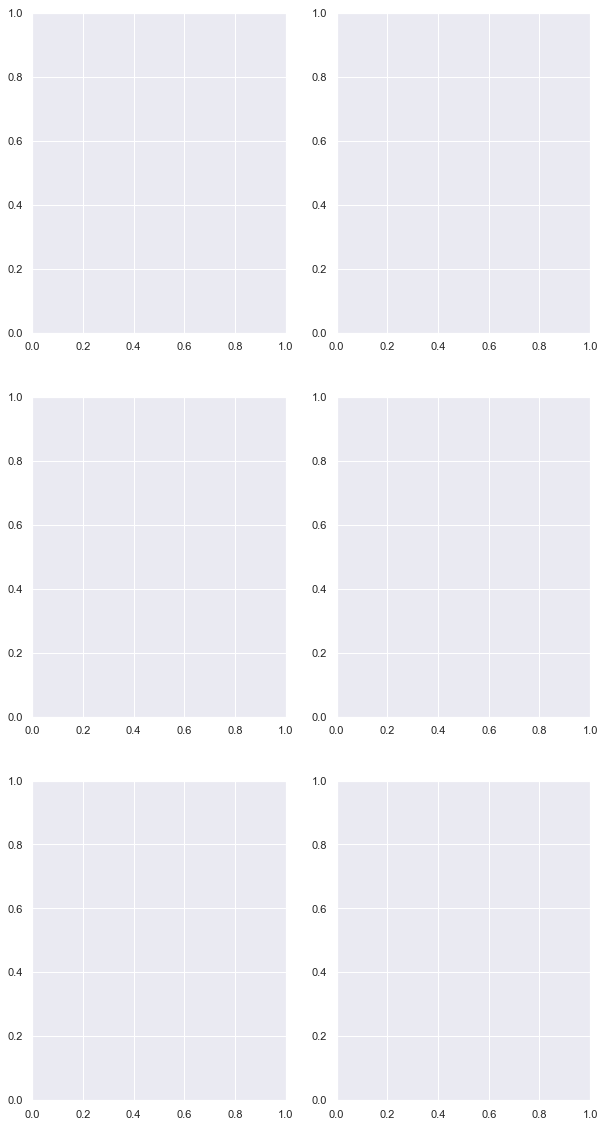

In [35]:
# Create subplots for 'funding_total_usd' and 'funding_rounds'
fig, axes = plt.subplots(3,2, figsize=(10, 20))

# histograms after outliers
sns.histplot(df['milestones'], color='#22b199', kde=True, ax=axes[0,0])
axes[0,0].set_title('milestones (After Removing Outliers)')
sns.histplot(df['funding_total_usd'],color='#22b199', kde=True, ax=axes[0,1])
axes[0,1].set_title('Funding Total (After Removing Outliers)')
sns.histplot(df['funding_rounds'], color='#22b199', kde=True, ax=axes[1,0])
axes[1,0].set_title('Funding Rounds (After Removing Outliers)')
sns.histplot(df['ROI'], color='#22b199', kde=True, ax=axes[1,1])
axes[1,1].set_title('ROI (After Removing Outliers)')
sns.histplot(df['active_days'], color='#22b199', kde=True, ax=axes[2,0])
axes[2,0].set_title('Active Days (After Removing Outliers)')

plt.tight_layout()
plt.show()

In [36]:
df.drop(columns =['lat', 'lng'],inplace = True)

##### First 10 values for category_code and country_code

In [37]:
df["category_code"].nunique()

42

In [38]:
# get top 10 value_counts in category code
top_10 = df['category_code'].value_counts()[:10]
top_10

software       1603
biotech         825
web             786
mobile          560
ecommerce       508
games_video     376
enterprise      357
hardware        312
advertising     302
health          219
Name: category_code, dtype: int64

In [39]:
# replace another categories other than top 10 by other
df['category_code'] = df['category_code'].apply(lambda x: x if x in top_10.index else 'other')

In [40]:
df['category_code'].value_counts()

other          2603
software       1603
biotech         825
web             786
mobile          560
ecommerce       508
games_video     376
enterprise      357
hardware        312
advertising     302
health          219
Name: category_code, dtype: int64

In [41]:
# Get the top 10 value counts in the 'country_code' column
top_10_countries = df['country_code'].value_counts()[:10]
top_10_countries

USA    5380
GBR     557
CAN     286
FRA     230
IND     177
ISR     167
DEU     144
ESP     139
AUS      89
IRL      82
Name: country_code, dtype: int64

In [42]:
# Replace countries not in the top 10 with 'other'
df['country_code'] = df['country_code'].apply(lambda x: x if x in top_10_countries.index else 'other')

In [43]:
df['country_code'].value_counts()

USA      5380
other    1200
GBR       557
CAN       286
FRA       230
IND       177
ISR       167
DEU       144
ESP       139
AUS        89
IRL        82
Name: country_code, dtype: int64

##### Create Column to Check if the company exists or not

In [44]:
filt = df['status'].isin(['operating','ipo'])
df["isClosed"] = np.where(filt, 1,0)
## We can Create the 'Is_Closed' column based on the 'closed_at' in another way
# df['Is_Closed'] = np.where(df['closed_at'].notnull(), 1, 0) # 1 for "Closed" and 0 for "Not Closed"

In [45]:
df["isClosed"].value_counts()

1    7418
0    1033
Name: isClosed, dtype: int64

In [46]:
# df.dropna(axis=0, subset=['closed_at'], inplace=True)
# df['closed_at'].isna().sum()

mode_ = df['closed_at'].mode()[0]
df['closed_at'].fillna(mode_, inplace = True)

df['closed_at'].isna().sum()

0

In [47]:
df.drop(columns=["closed_at"], inplace = True)

In [48]:
df['status'].value_counts()

operating    7402
closed        635
acquired      398
ipo            16
Name: status, dtype: int64

In [49]:
corr_df = df[["investment_rounds","invested_companies", "funding_total_usd","relationships"
            , "active_days","isClosed"]]

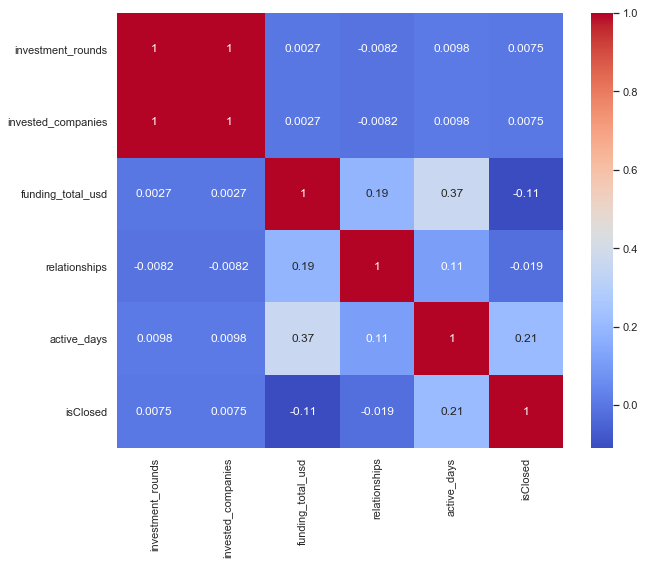

In [50]:
%matplotlib inline
plt.figure(figsize=(10, 8))
sns.set_context('notebook')
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [51]:
df.to_csv("preprocessed_data.csv", index = False)